Exploratory Data Analysis (EDA) - Titanic Dataset Exercises

Import Libraries

In [4]:
!pip install ydata-profiling

ERROR: Could not find a version that satisfies the requirement ydata-profiling (from versions: none)

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for ydata-profiling


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset

In [7]:
url = "C:\\AI-ML\\AI_MI_Career\\datasets\\train.csv"
df = pd.read_csv(url)

In [8]:
# --------------------------------------
# 1️⃣ Initial Exploration
# --------------------------------------
print("\n📄 Head of the dataset:")
print(df.head())

print("\n🧾 Info:")
df.info()

print("\n📊 Description:")
print(df.describe(include='all'))

print("\n🔍 Missing values:")
print(df.isnull().sum())



📄 Head of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

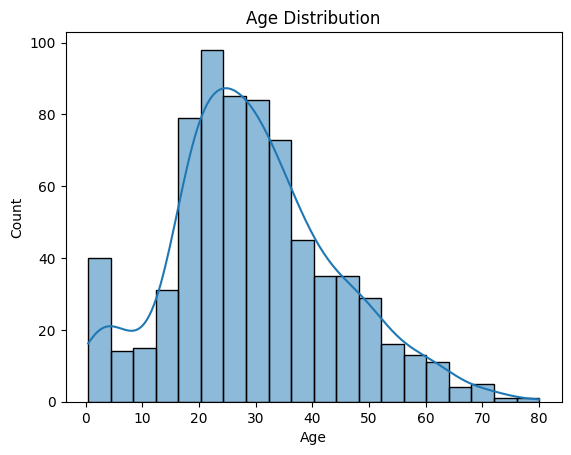

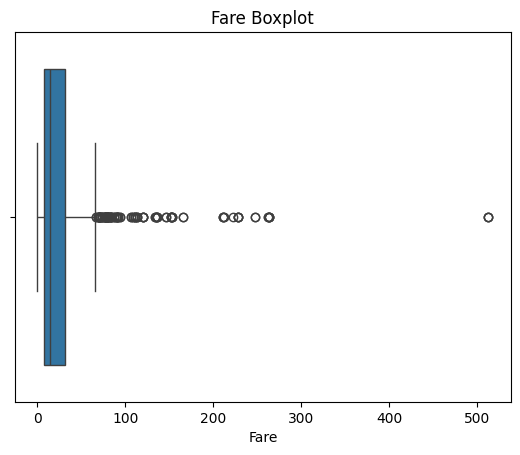

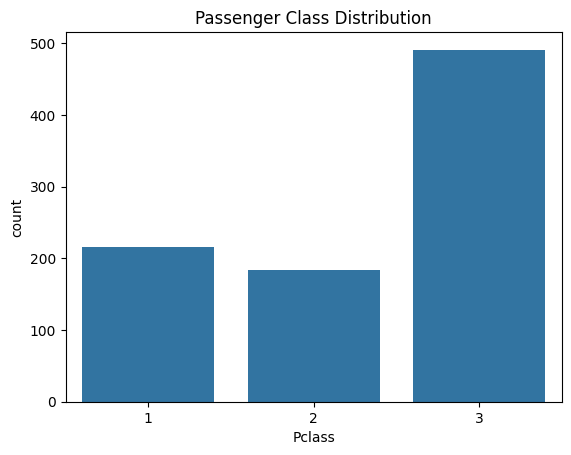

In [11]:
# --------------------------------------
# 2️⃣ Univariate Analysis
# --------------------------------------
# Numerical: Histogram, Boxplot
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot')
plt.show()

# Categorical: Countplot
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

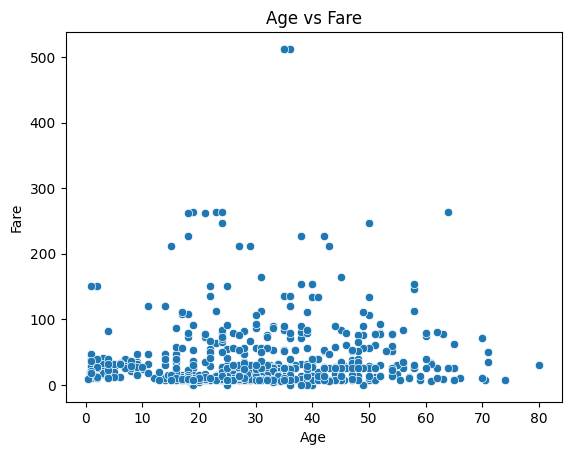

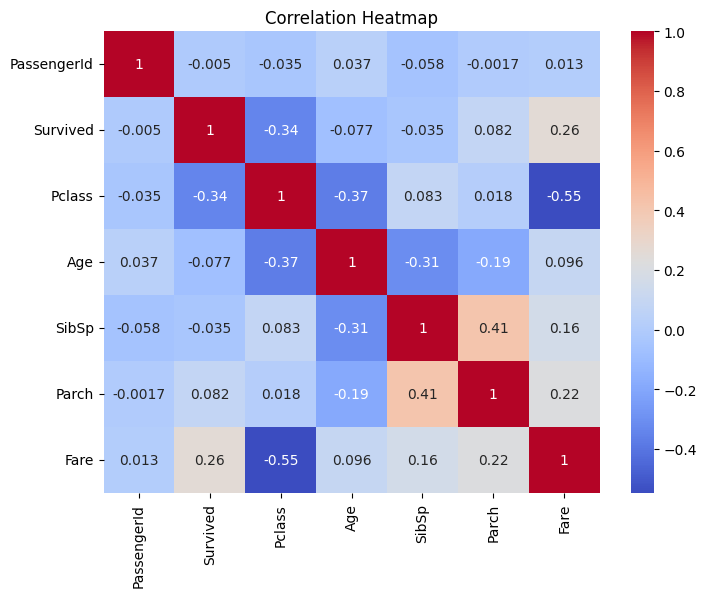

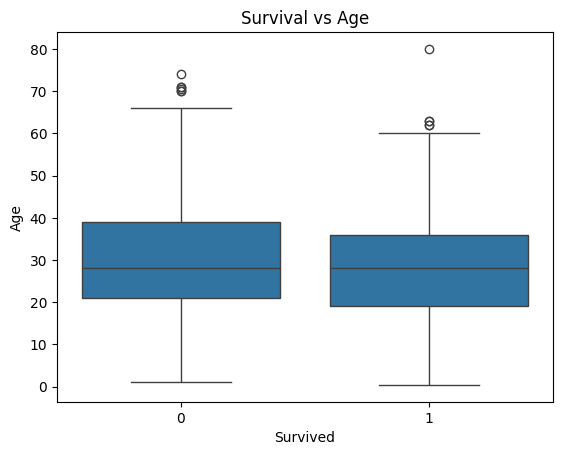

In [14]:
# --------------------------------------
# 3️⃣ Bivariate Analysis
# --------------------------------------
# Scatterplot: Age vs Fare
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.show()

# Heatmap: Correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot: Survival vs Age
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival vs Age')
plt.show()

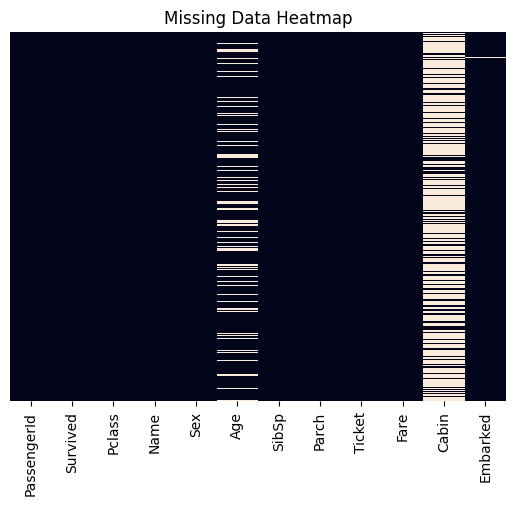


🚨 Outliers in Fare column:
         Fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
52    76.7292
..        ...
846   69.5500
849   89.1042
856  164.8667
863   69.5500
879   83.1583

[116 rows x 1 columns]


In [15]:
# --------------------------------------
# 4️⃣ Missing Values & Outliers
# --------------------------------------
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

# Outlier detection with IQR (Fare)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR))]
print("\n🚨 Outliers in Fare column:")
print(outliers[['Fare']])